In [1]:
from importlib import reload
import Fibre_Calculation_Functions as ff
from Fibre_Calculation_Functions import db_to_mw, mw_to_db
DEF_WVL = [1545,1560]

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
reload(ff)

<module 'Fibre_Calculation_Functions' from 'c:\\Users\\rohan\\OneDrive - Victoria University of Wellington - STAFF\\Documents\\Published Fibre Work\\Fibre_Calculation_Functions.py'>

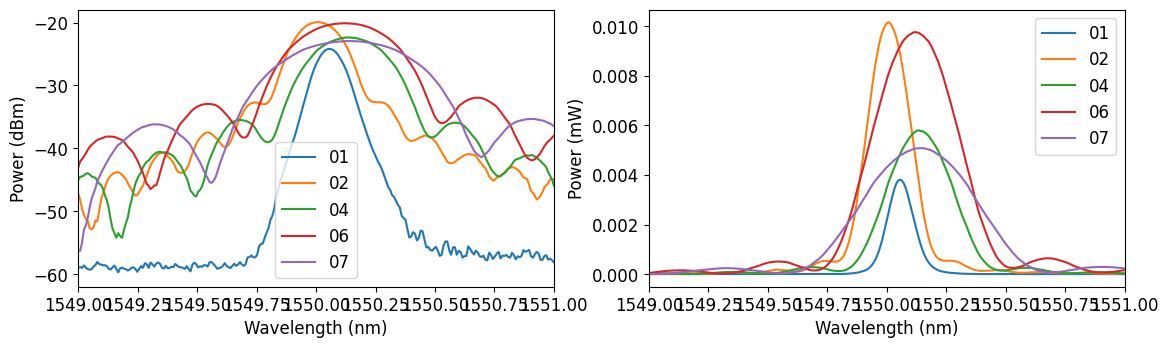

In [3]:
rootdir = r"Fibre Data Files\Stationary Spectra\FBGs 24.04"
fnames = ['01.txt','02.txt','04.txt', '06.txt', '07.txt']

total_si255 = ff.spectral_summation.load_from_files(rootdir, fnames, wvl_range = DEF_WVL)
total_si255.plot_powers()
_ = total_si255.fit_gaussian()

In [15]:
reload(ff)
responses_fnames = ff.get_common_fileext(dir= r"Fibre Data Files\Time Dependent Spectra\Initial FBG array strain testing", ext = '.csv')
tensile_fnames = ff.get_common_fileext(dir= r"Fibre Data Files\Time Dependent Spectra\Initial FBG array strain testing", ext= '.xls')
ids = ['FBG01', 'FBG02', 'FBG04', 'FBG06', 'FBG07']

spectra = []
for ten_fname, resp_fname, id in zip(tensile_fnames, responses_fnames, ids):
    forces, force_first_time, force_times = ff.load_tensile_data(ten_fname)
    signal, wvl, (first_time,times) = ff.load_spectrum_timedep(resp_fname)

    spec = ff.spectral_td.load_from_array(signal = signal, wvl = wvl, times = times, first_time = first_time,
                                          force_first_time=force_first_time, forces = forces, force_times = force_times, id = id)

    spectra.append(spec)

arr = ff.spectral_array(spectra, array_name = "Initial FBG array strain testing")

Loaded from .csv
Loaded from .csv
Loaded from .csv
Loaded from .csv
Loaded from .csv


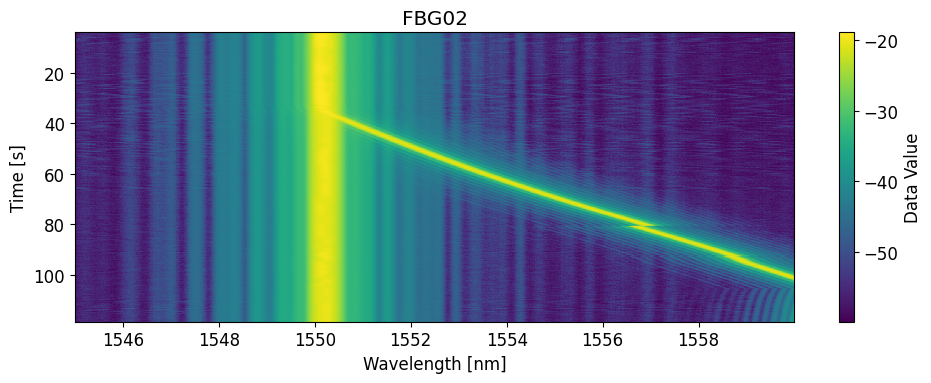

In [7]:
new = arr[1]
new.plot_colourmap()

In [ ]:
_ = new.fitting_combined_spectra(run_array=total_si255)

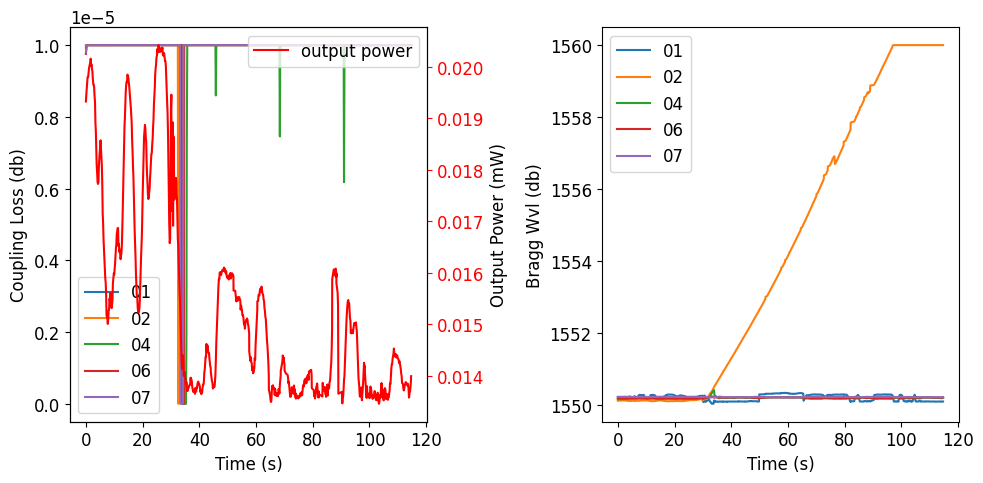

In [ ]:
### Losses should be upper bounded up 1e-5 to get good accuracy
new.plot_fitting_values()

In [ ]:
_ = new.fitting_combined_spectra_SHIFTSONLY(run_array=total_si255)

100%|██████████| 756/756 [00:36<00:00, 20.89it/s]


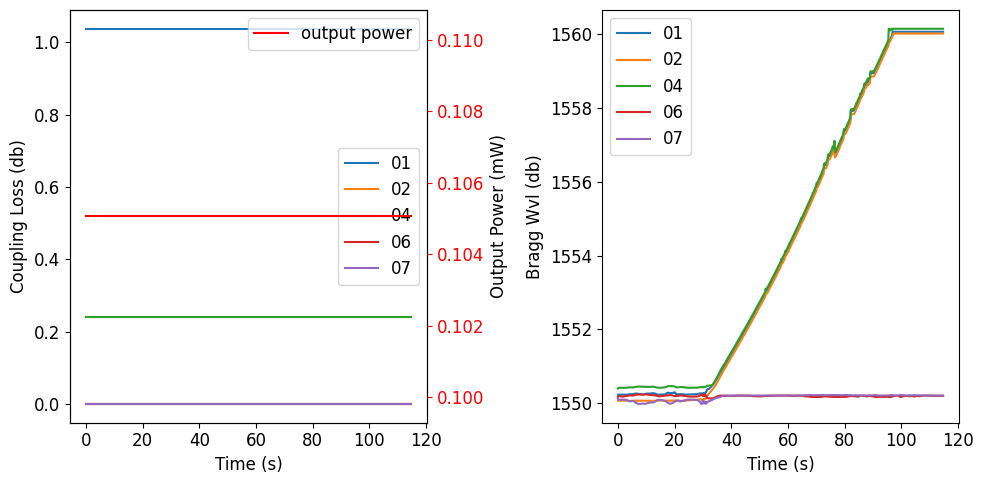

In [ ]:
new.plot_fitting_values()

c:\Users\rohan\OneDrive - Victoria University of Wellington - STAFF\Documents\Published Fibre Work\Fibre_Calculation_Functions.py:2072: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [ax.legend(loc = 'lower right') for ax in sec_axs]
c:\Users\rohan\OneDrive - Victoria University of Wellington - STAFF\Documents\Published Fibre Work\Fibre_Calculation_Functions.py:2072: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [ax.legend(loc = 'lower right') for ax in sec_axs]
c:\Users\rohan\OneDrive - Victoria University of Wellington - STAFF\Documents\Published Fibre Work\Fibre_Calculation_Functions.py:2072: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is c

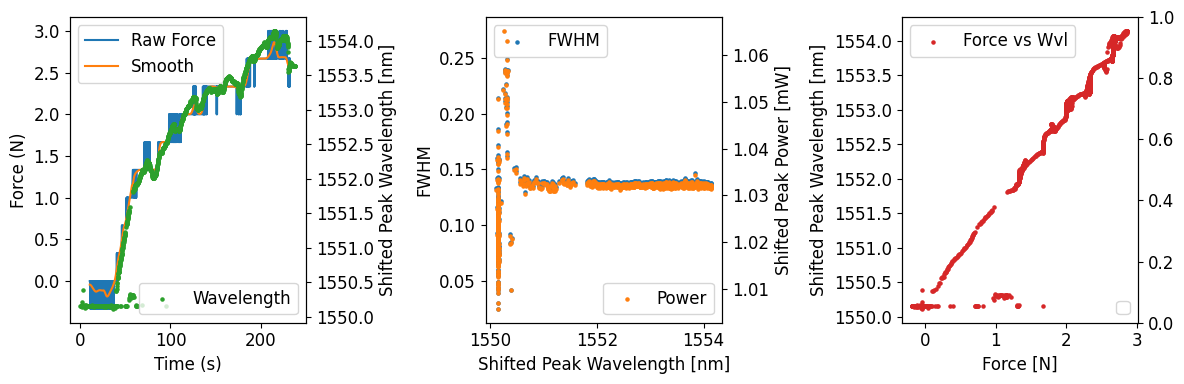

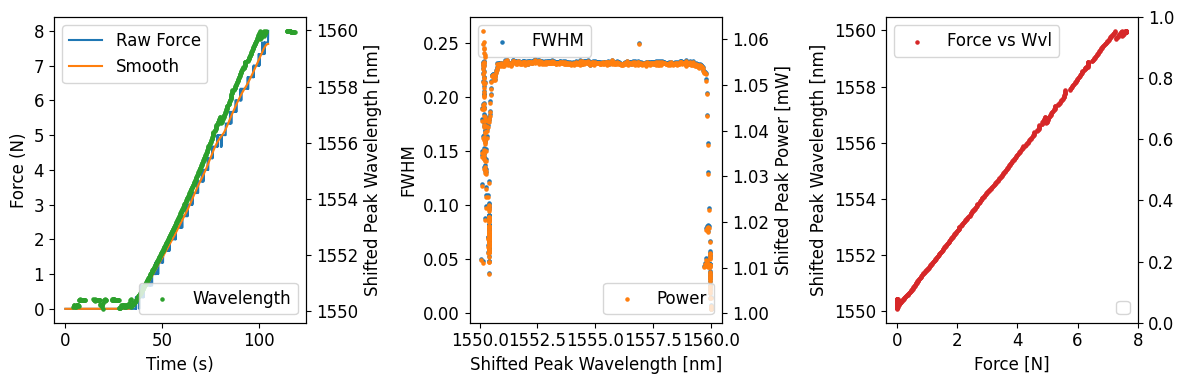

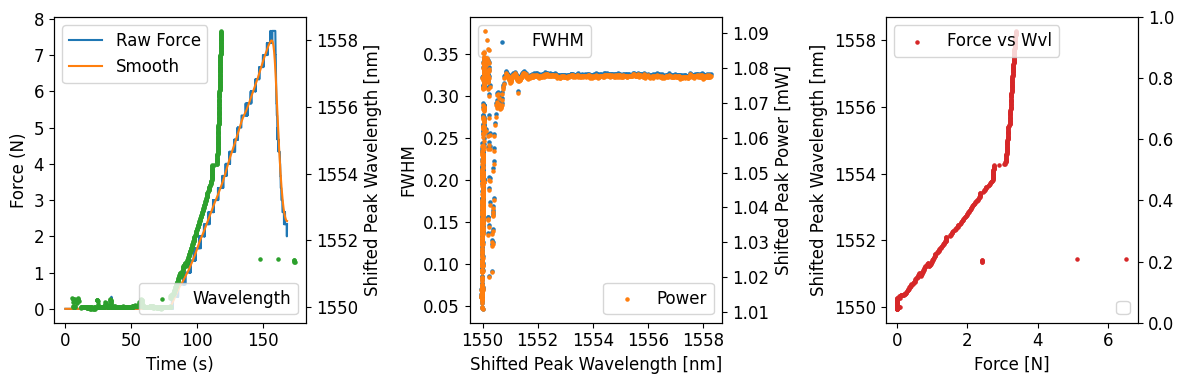

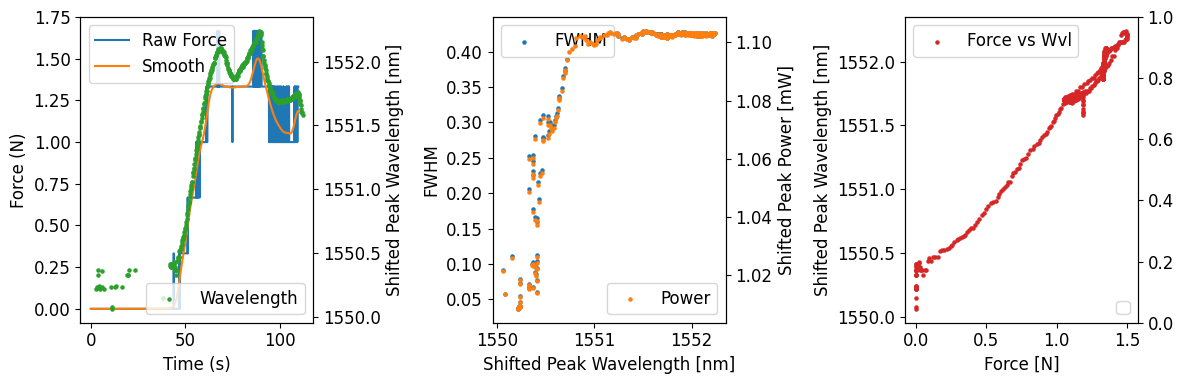

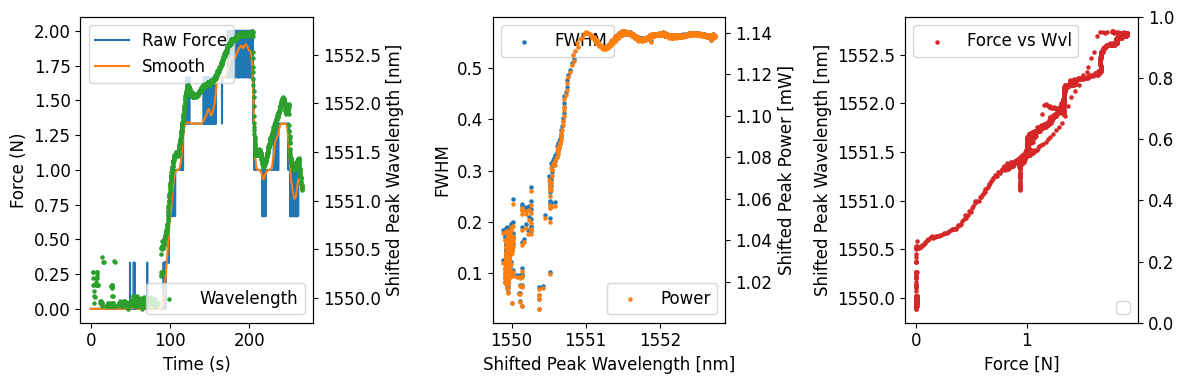

In [22]:
for i in range(len(arr)):
    arr[i].shifted_peaks_bg()
    arr[i].old_peak_v_force(20)
    # break

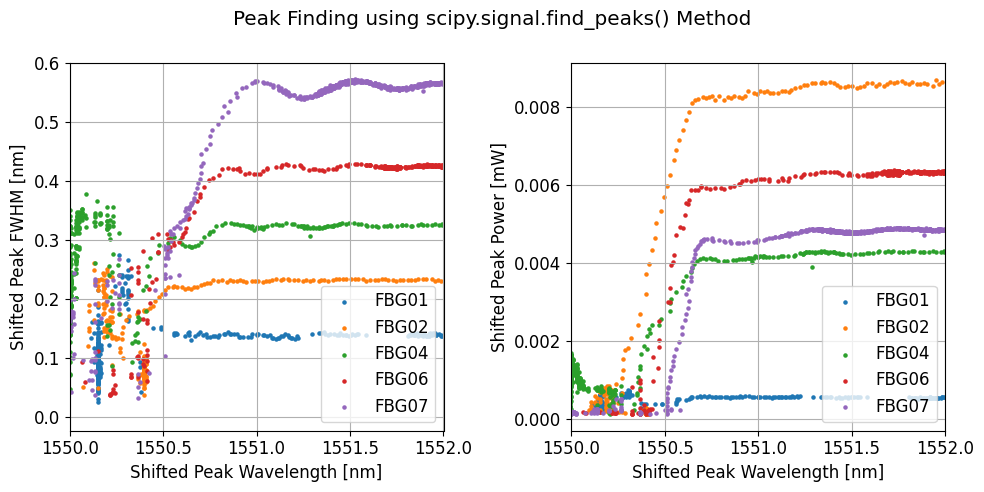

In [23]:
fig,axs = plt.subplots(1,2, figsize = 5*np.array([2,1]))

for run in arr:
    axs[0].scatter(run.peak_df.wvl, run.peak_df.fwhm, s=5, label = run.id)
    axs[1].scatter(run.peak_df.wvl, db_to_mw(run.peak_df.db), s=5, label = run.id)

axs[0].set_ylabel('Shifted Peak FWHM [nm]')
axs[1].set_ylabel('Shifted Peak Power [mW]')

for ax in axs:
    ax.grid()
    ax.set(xlim = [1550,1552], xlabel = 'Shifted Peak Wavelength [nm]')
    ax.legend(loc ='lower right')

plt.suptitle("Peak Finding using scipy.signal.find_peaks() Method")
plt.tight_layout()